In [10]:
import numpy as np
import cmath
from scipy import signal
import matplotlib.pyplot as plt

Convolución de señales

La convolución es una operación que se realiza entre dos señales.

In [14]:
N = 10 #numero de muestras
n = np.arange(0,N+1) #varaible de tiempo (muestras)

Generación de dos funciones reales a partir de exponenciales complejas

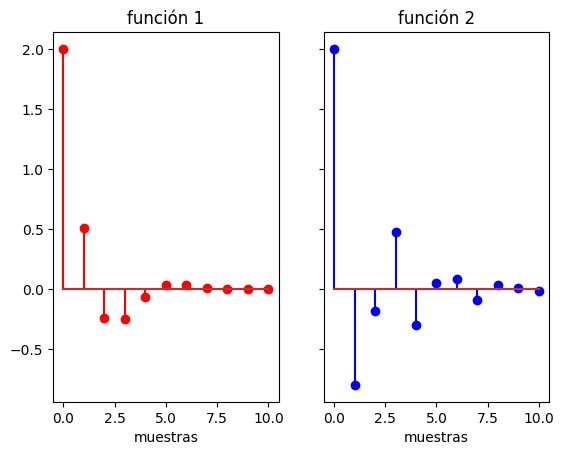

In [17]:
# parametros función 1 (polares)
r1 = 0.5
p1 = 1.04

# parámetros función 2 (cartesianos)
re2 = -0.4
im2 = 0.5


#Generando funciones
f1 = np.zeros(np.shape(n),dtype=complex)
f2 = np.zeros(np.shape(n),dtype=complex)

for i in range(0,len(n)):
    val = complex(np.cos(p1*n[i]), np.sin(p1*n[i]))
    f1[i] = r1**n[i] * ( val + np.conjugate(val) )

    val = complex(re2,im2)
    f2[i] = val**n[i] + np.conjugate(val)**n[i]

# Parte real e imaginaria
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('función 1')
ax1.stem(n,f1.real,linefmt='red')
ax1.set_xlabel('muestras')
ax2.set_title('función 2')
ax2.stem(n,f2.real,linefmt='blue')
ax2.set_xlabel('muestras')
plt.show()

Convolución f1*f2

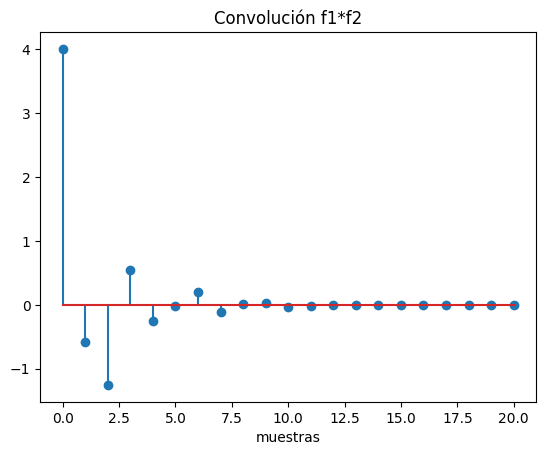

In [24]:
Ff = signal.convolve(f1,f2)
nf = np.arange(0,len(Ff))
plt.figure(2)
plt.stem(nf,Ff.real)
plt.xlabel('muestras')
plt.title('Convolución f1*f2')
plt.show()

Propiedad conmutativa de la convolución

Note como los resultados son iguales (salvo errores aproximación).

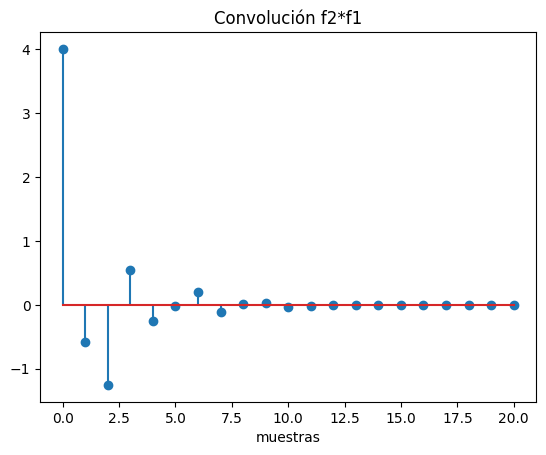

In [21]:
Fg = signal.convolve(f2,f1)
plt.figure(3)
plt.stem(nf,Fg.real)
plt.xlabel('muestras')
plt.title('Convolución f2*f1')
plt.show()

Diferencias f1*f2 vs f2*f1

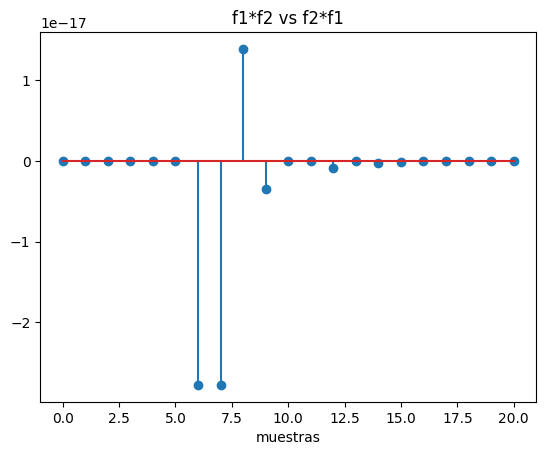

In [22]:
df = Ff-Fg
plt.figure(4)
plt.stem(nf,df.real)
plt.xlabel('muestras')
plt.title('f1*f2 vs f2*f1')
plt.show()